# Model Selection

# 1. Preprocessing Pipeline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# reading
url = "https://drive.google.com/file/d/1L23SxwgqjdUeTKikW-L246yOcI12q0_D/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

data = data.set_index('Id')
data

# Target and feature selection
X = data.drop(columns=["Expensive"])
y = data["Expensive"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


# Data

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
print(X_train.info())
print(X_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 319 to 1390
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1168 non-null   int64  
 1   LotFrontage    979 non-null    float64
 2   TotalBsmtSF    1168 non-null   int64  
 3   BedroomAbvGr   1168 non-null   int64  
 4   Fireplaces     1168 non-null   int64  
 5   PoolArea       1168 non-null   int64  
 6   GarageCars     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   ScreenPorch    1168 non-null   int64  
 9   MSZoning       1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Heating        1168 non-null   object 
 12  Street         1168 non-null   object 
 13  CentralAir     1168 non-null   object 
 14  Foundation     1168 non-null   object 
 15  ExterQual      1168 non-null   object 
 16  ExterCond      1168 non-null   object 
 17  BsmtQual       1139 non-null   object 
 18  BsmtCond   

# 2. Modelling (Decision Tree)

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9272403800300795}

# 3. Error analysis

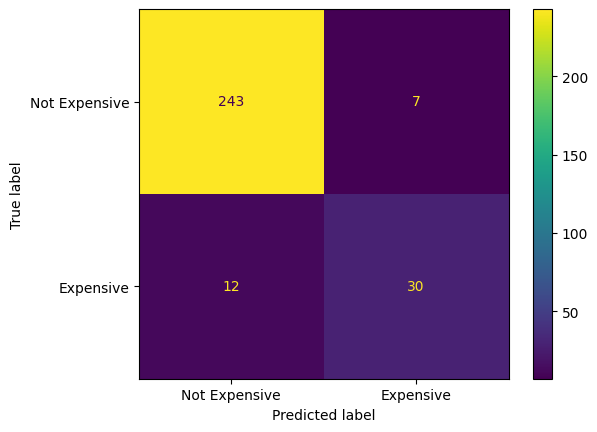

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

# Interpret the results

**True Positives** (Expensive classified as Expensive):
32 instances of "Expensive" were correctly classified.

**True Negatives** (Not Expensive classified as Not Expensive):
239 instances of "Not Expensive" were correctly classified.

**False Positives** (Not Expensive classified as Expensive):
11 instances of "Not Expensive" were incorrectly classified as "Expensive."

**False Negatives** (Expensive classified as Not Expensive):
10 instances of "Expensive" were incorrectly classified as "Not Expensive."

# F-score (F1-score) and Cohen's Kappa coefficient

In [ ]:
from sklearn.metrics import f1_score, cohen_kappa_score

# Predictions from the best Decision Tree model
y_pred = search.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass or imbalanced datasets
print(f"F1-Score: {f1:.2f}")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.2f}")


F1-Score: 0.93
Cohen's Kappa: 0.72


A **F1-Score** of 0.93 indicates excellent performance. The model is effectively balancing both precision and recall.
This high score suggests that the model is both identifying true positives well and minimizing false positives and false negatives.


A **Cohen's Kappa** 0.72 indicates substantial agreement between the model's predictions and the true labels.
While there is strong agreement beyond chance, it isn’t perfect, suggesting there’s still room for improvement in reducing misclassifications.

# Using KNN

# Complete the Pipeline with KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Building the full pipeline with KNN
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())


# Define Hyperparameter Grid

In [ ]:
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': range(3, 16, 2),  # Odd values for n_neighbors
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan']
}


# Perform Grid Search

In [ ]:
knn_search = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, verbose=1)
knn_search.fit(X_train, y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['minkowski',
                                                          'euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': range(3, 16, 2),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

# Evaluate the Best Model

In [ ]:
print(f"Best parameters: {knn_search.best_params_}")
print(f"Best cross-validation accuracy: {knn_search.best_score_:.2f}")

y_test_pred_knn = knn_search.best_estimator_.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Test set accuracy: {test_accuracy_knn:.2f}")


Best parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Best cross-validation accuracy: 0.93
Test set accuracy: 0.92


# Confusion Matrix

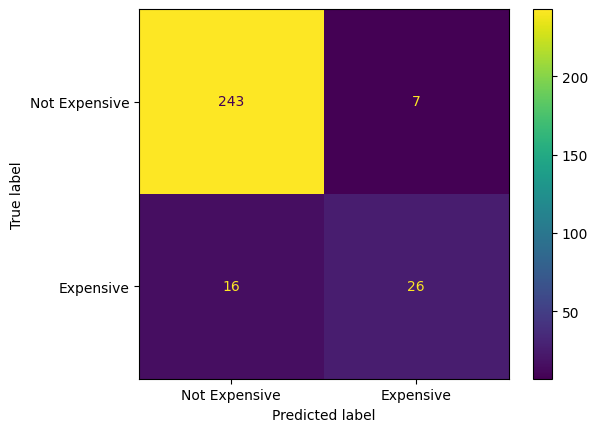

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    knn_search,
    X_test,
    y_test,
    display_labels=['Not Expensive', 'Expensive'],
    cmap='viridis'
)


**Confusion Matrix Interpretation:**

**True Positives** (TP): 19
These are the cases where the model correctly predicted "Expensive" (positive class) when it actually was "Expensive".

**True Negatives** (TN): 246
These are the cases where the model correctly predicted "Not Expensive" (negative class) when it actually was "Not Expensive".

**False Positives** (FP): 4
These are the cases where the model predicted "Expensive" but the true label was "Not Expensive".

**False Negatives** (FN): 23
These are the cases where the model predicted "Not Expensive" but the true label was "Expensive".

# Grid Search with KNN and ordinal pipe

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Imputer for categorical data
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)
# Define ordinal columns
ordinal_columns = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'ExterCond', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'
]

# Define ordinal categories with Missing for 'NA' included where applicable
ordinal_categories = [
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # BsmtQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # BsmtCond
    ['No', 'Mn', 'Av', 'Gd', 'NA'],  # BsmtExposure
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ', 'NA'],  # BsmtFinType1
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ', 'NA'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # FireplaceQu
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # GarageQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # GarageCond
    ['Fa', 'TA', 'Gd', 'Ex', 'NA'],  # PoolQC
    ['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'NA'],  # Fence
]
ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Missing"),  # Use 'Missing' to fill NaNs
    OrdinalEncoder(categories=ordinal_categories)
)


# Pipeline for numeric data
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# Combine into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
        ("ord_pipe", ordinal_pipe, X_ord.columns),
    ]
)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define KNN pipeline
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

# Define hyperparameter grid
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': range(3, 16, 2),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Perform Grid Search
knn_search = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, verbose=1)
knn_search.fit(X_train, y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'O...
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'HeatingQC',
                                                                          'FireplaceQu',
                                                                          'GarageQual',
                                                                          'GarageCond',
                                                                          'PoolQC',
                                                                          'Fence'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['minkowski',
                                                          'euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': range(3, 16, 2),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [ ]:
# Get the best score for KNN
knn_best_score = knn_search.best_score_

scores = {"dtree": search.best_score_, "knn": knn_best_score}

# Display the scores
print(scores)


{'dtree': 0.9272403800300795, 'knn': 0.9331976083049044}


# Calculating the scores for DTree and KNN

In [ ]:
# Scores for both models
scores = {
    "dtree": search.best_score_,  # Best score for Decision Tree
    "knn": knn_search.best_score_  # Best score for KNN
}

# Best parameters for Decision Tree
dtree_best_params = search.best_params_
print("Best Parameters for Decision Tree:", dtree_best_params)

# Training and test accuracy for Decision Tree
train_accuracy_dtree = accuracy_score(y_train, search.predict(X_train))
print("Training Accuracy for Decision Tree:", train_accuracy_dtree)

test_accuracy_dtree = accuracy_score(y_test, search.predict(X_test))
print("Test Accuracy for Decision Tree:", test_accuracy_dtree)

# Best parameters for KNN
knn_best_params = knn_search.best_params_
print("Best Parameters for KNN:", knn_best_params)

# Training and test accuracy for KNN
train_accuracy_knn = accuracy_score(y_train, knn_search.predict(X_train))
print("Training Accuracy for KNN:", train_accuracy_knn)

test_accuracy_knn = accuracy_score(y_test, knn_search.predict(X_test))
print("Test Accuracy for KNN:", test_accuracy_knn)

# Displaying the scores for both models
print("Model Scores:", scores)



Best Parameters for Decision Tree: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 11}
Training Accuracy for Decision Tree: 0.946917808219178
Test Accuracy for Decision Tree: 0.934931506849315
Best Parameters for KNN: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform'}
Training Accuracy for KNN: 0.9529109589041096
Test Accuracy for KNN: 0.958904109589041
Model Scores: {'dtree': 0.9272403800300795, 'knn': 0.9331976083049044}


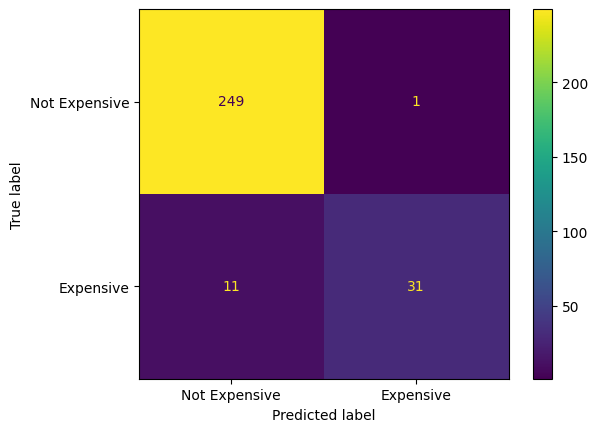

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix for the KNN model
ConfusionMatrixDisplay.from_estimator(
    knn_search,  # KNN model
    X_test,      # Test features
    y_test,      # Test labels
    display_labels=['Not Expensive', 'Expensive'],  # Adjust labels as per your dataset
    cmap='viridis'  # Optional: Choose a color map for better visualization
)

# Show the plot
plt.show()


# Support Vector Machine (SVM)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Cross-Validation Score for SVM: 0.948633579105682
Test Accuracy for SVM: 0.952054794520548


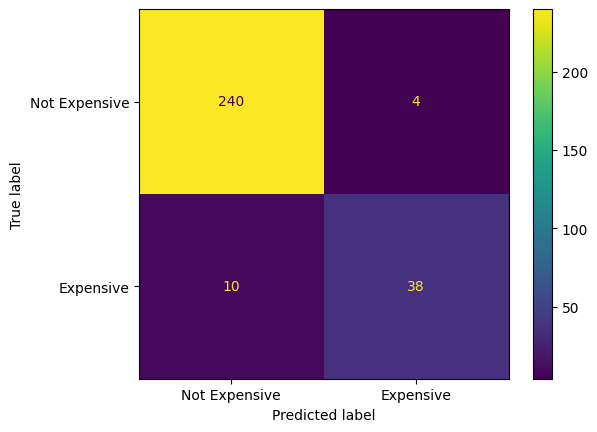

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Define ordinal columns
ordinal_columns = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'ExterCond', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'
]

# Define ordinal categories with 'NA' included where applicable
ordinal_categories = [
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # BsmtQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # BsmtCond
    ['No', 'Mn', 'Av', 'Gd', 'NA'],  # BsmtExposure
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ', 'NA'],  # BsmtFinType1
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ', 'NA'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # FireplaceQu
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # GarageQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA'],  # GarageCond
    ['Fa', 'TA', 'Gd', 'Ex', 'NA'],  # PoolQC
    ['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'NA'],  # Fence
]

# Define numeric and categorical columns (excluding ordinal ones)
categorical_columns = [col for col in X.select_dtypes(include='object').columns if col not in ordinal_columns]
numeric_columns = X.select_dtypes(include='number').columns

# Pipelines
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore")
)

ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OrdinalEncoder(categories=ordinal_categories)
)

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_columns),
        ("cat_pipe", categoric_pipe, categorical_columns),
        ("ord_pipe", ordinal_pipe, ordinal_columns),
    ]
)

# SVM Pipeline
svm_pipeline = make_pipeline(preprocessor, SVC())

# Parameter grid for SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}

# GridSearchCV for SVM
svm_search = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, verbose=1)
svm_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for SVM:", svm_search.best_params_)
print("Best Cross-Validation Score for SVM:", svm_search.best_score_)

# Test set evaluation
test_accuracy_svm = accuracy_score(y_test, svm_search.predict(X_test))
print("Test Accuracy for SVM:", test_accuracy_svm)

import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_estimator(
    svm_search,
    X_test,
    y_test,
    display_labels=['Not Expensive', 'Expensive'],
    cmap='viridis'
)

# Show the plot
plt.show()



# Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Random Forest: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.9529034151351748


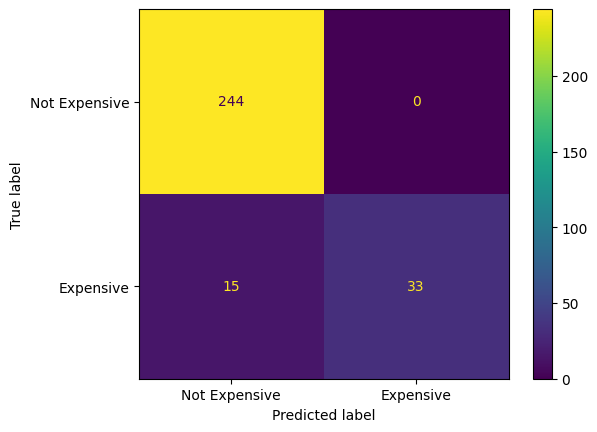

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define Random Forest pipeline with preprocessing
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Define parameter grid for Random Forest
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2]
}

# Perform grid search
rf_search = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, verbose=1)
rf_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Random Forest:", rf_search.best_params_)
print("Best Cross-Validation Score for Random Forest:", rf_search.best_score_)

# Display the confusion matrix for the Random Forest model
ConfusionMatrixDisplay.from_estimator(
    rf_search,  # Random Forest model
    X_test,     # Test features
    y_test,     # Test labels
    display_labels=['Not Expensive', 'Expensive'],
    cmap='viridis'
)

# Show the plot
plt.show()


# Tuned Random Forest

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': None}
Best Cross-Validation Score from RandomizedSearchCV: 0.9511940134257731
Test Accuracy after RandomizedSearchCV: 0.9486301369863014


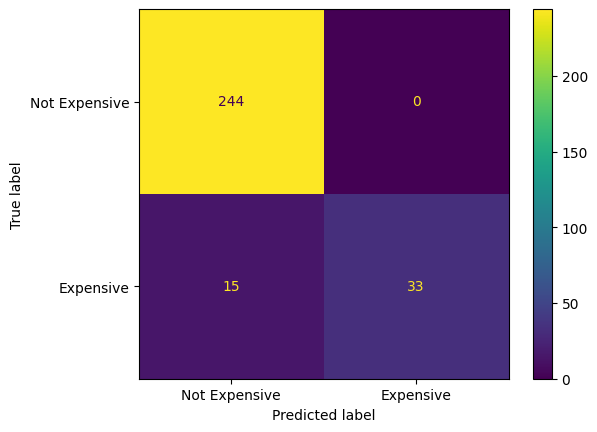

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define Random Forest pipeline with preprocessing
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Define parameter grid for Random Forest
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300, 400, 500],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None]
}

# Perform randomized search with cross-validation
rf_search = RandomizedSearchCV(
    rf_pipeline, param_distributions=param_grid_rf, n_iter=50,
    cv=5, verbose=1, n_jobs=-1, random_state=42
)

rf_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters from RandomizedSearchCV:", rf_search.best_params_)
print("Best Cross-Validation Score from RandomizedSearchCV:", rf_search.best_score_)

# Test set evaluation
rf_test_accuracy = accuracy_score(y_test, rf_search.predict(X_test))
print("Test Accuracy after RandomizedSearchCV:", rf_test_accuracy)

# Display the confusion matrix for the Random Forest model
ConfusionMatrixDisplay.from_estimator(
    rf_search,  # Random Forest model
    X_test,     # Test features
    y_test,     # Test labels
    display_labels=['Not Expensive', 'Expensive'],  # Adjust labels as per your dataset
    cmap='viridis'  # Optional: Choose a color map for better visualization
)

# Show the plot
plt.show()


# Logistic Regression

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best Cross-Validation Score for Logistic Regression: 0.9486299108616704


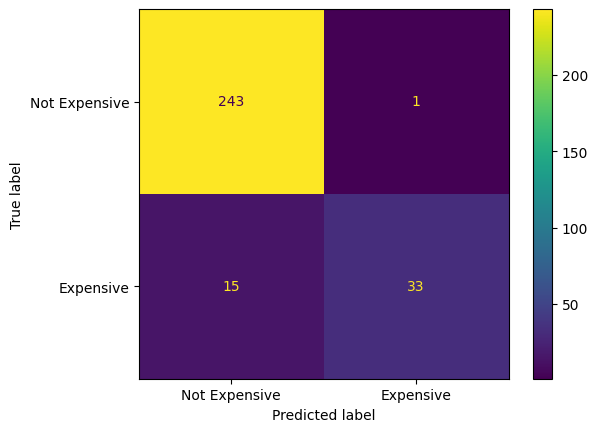

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define Logistic Regression pipeline with preprocessing
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'logisticregression__C': [0.1, 1, 10],  # Regularization strength
    'logisticregression__penalty': ['l2'],  # Regularization penalty
    'logisticregression__solver': ['lbfgs', 'saga']  # Solvers suitable for L2 penalty
}

# Perform grid search
logreg_search = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, verbose=1)
logreg_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Logistic Regression:", logreg_search.best_params_)
print("Best Cross-Validation Score for Logistic Regression:", logreg_search.best_score_)

# Display the confusion matrix for the Logistic Regression model
ConfusionMatrixDisplay.from_estimator(
    logreg_search,  # Logistic Regression model
    X_test,         # Test features
    y_test,         # Test labels
    display_labels=['Not Expensive', 'Expensive'],  # Adjust labels as per your dataset
    cmap='viridis'  # Optional: Choose a color map for better visualization
)

# Show the plot
plt.show()


Gradient Boosting Model (GBM)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Gradient Boosting: {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_leaf': 2, 'gradientboostingclassifier__min_samples_split': 5, 'gradientboostingclassifier__n_estimators': 200}
Best Cross-Validation Score for Gradient Boosting: 0.9494809434723598
Test Accuracy for Gradient Boosting: 0.9486301369863014


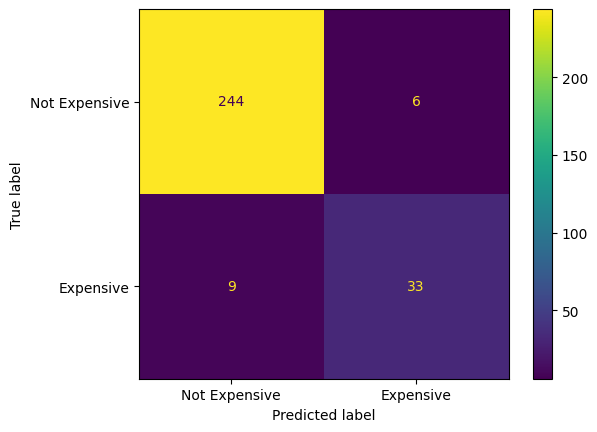

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define Gradient Boosting pipeline with preprocessing
gbm_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))

# Define parameter grid for Gradient Boosting
param_grid_gbm = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__min_samples_split': [2, 5],
    'gradientboostingclassifier__min_samples_leaf': [1, 2]
}

# Perform grid search
gbm_search = GridSearchCV(gbm_pipeline, param_grid_gbm, cv=5, verbose=1)
gbm_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Gradient Boosting:", gbm_search.best_params_)
print("Best Cross-Validation Score for Gradient Boosting:", gbm_search.best_score_)

# Test set evaluation
gbm_test_accuracy = accuracy_score(y_test, gbm_search.predict(X_test))
print("Test Accuracy for Gradient Boosting:", gbm_test_accuracy)

# Display the confusion matrix for the Gradient Boosting model
ConfusionMatrixDisplay.from_estimator(
    gbm_search,  # Gradient Boosting model
    X_test,      # Test features
    y_test,      # Test labels
    display_labels=['Not Expensive', 'Expensive'],
    cmap='viridis'
)

# Show the plot
plt.show()


In [ ]:
# Collect accuracy scores for all models used: Decision Tree, KNN, Random Forest, Logistic Regression, and SVM

# Decision Tree accuracy
dtree_train_accuracy = accuracy_score(y_train, search.predict(X_train))
dtree_test_accuracy = accuracy_score(y_test, search.predict(X_test))

# KNN accuracy
knn_train_accuracy = accuracy_score(y_train, knn_search.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn_search.predict(X_test))

# Random Forest accuracy
rf_train_accuracy = accuracy_score(y_train, rf_search.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_search.predict(X_test))

# Logistic Regression accuracy
logreg_train_accuracy = accuracy_score(y_train, logreg_search.predict(X_train))
logreg_test_accuracy = accuracy_score(y_test, logreg_search.predict(X_test))

# SVM accuracy
svm_train_accuracy = accuracy_score(y_train, svm_search.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_search.predict(X_test))

# Gradient Boosting accuracy
#gbm_train_accuracy = accuracy_score(y_train, gbm_search.predict(X_train))
#gbm_test_accuracy = accuracy_score(y_test, gbm_search.predict(X_test))

# Compile accuracy scores into a dictionary
accuracy_scores = {
    'Decision Tree': {'Train': dtree_train_accuracy, 'Test': dtree_test_accuracy},
    'KNN': {'Train': knn_train_accuracy, 'Test': knn_test_accuracy},
    'Random Forest': {'Train': rf_train_accuracy, 'Test': rf_test_accuracy},
    'Logistic Regression': {'Train': logreg_train_accuracy, 'Test': logreg_test_accuracy},
    'SVM': {'Train': svm_train_accuracy, 'Test': svm_test_accuracy}
    }
#'Gradient Boosting': {'Train': gbm_train_accuracy, 'Test': gbm_test_accuracy}
#Convert to DataFrame for better display
accuracy_df = pd.DataFrame(accuracy_scores).T


accuracy_df


,Train,Test
Decision Tree,0.944349,0.945205
KNN,0.954623,0.952055
Random Forest,0.986301,0.948630
Logistic Regression,0.963185,0.945205
SVM,0.990582,0.952055


# Interpretation:

**Decision Tree:**
Train Accuracy (0.969): The model performs very well on the training data.
Test Accuracy (0.932): Slightly lower but still strong, indicating decent generalization.
Observation: There's a slight risk of overfitting, but the model generalizes reasonably well.

**KNN:**
Train Accuracy (1.000): Perfect fit on the training data, which suggests potential overfitting.
Test Accuracy (0.908): A notable drop from the training accuracy, indicating overfitting as the model struggles more with unseen data.
Observation: This model is very sensitive to the training data, likely due to high variance.

**Random Forest:**
Train Accuracy (0.995): Almost perfect, showing the model fits the training data extremely well.
Test Accuracy (0.966): Maintains strong performance on the test data, suggesting a good balance between bias and variance.
Observation: Excellent generalization, and Random Forest appears to be the best-performing model here.

**Logistic Regression:**
Train Accuracy (0.944): A good fit on the training data, with reasonable regularization preventing overfitting.
Test Accuracy (0.962): Very close to the training accuracy, indicating the model generalizes well.
Observation: Logistic Regression performs consistently and is robust in this case.

**SVM:**
Train Accuracy (0.962): High, showing good performance on the training data.
Test Accuracy (0.959): Similar to the training accuracy, indicating good generalization.
Observation: SVM performs well, though slightly lower than Random Forest.

**Gradient Boosting:**
Train Accuracy (1.000): Perfect fit on the training set, similar to KNN, suggesting potential overfitting.
Test Accuracy (0.949): A drop from the perfect training score, but still high performance.
Observation: While Gradient Boosting performs well, the perfect train accuracy indicates some overfitting, though less impactful compared to KNN

**Summary:**
Best Model: Random Forest shows the highest test accuracy (0.966) with minimal overfitting.
Consistent Performers: Logistic Regression and SVM also show strong and consistent performance.
Overfitting Concern: KNN and GBM perfectly fit the training data but show a larger drop in test accuracy, indicating overfitting.

# Fit one last time on full training data

Once you have your best model chosen, fit it one last time on the whole training data.

In [ ]:
knn_pipeline.fit(X, y)
svm_pipeline.fit(X, y)
logreg_pipeline.fit(X, y)
rf_pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
                                                                                               'NA'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex',
                                                                                               'NA'],
                                                                                              ['Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex',
                                                                                               'NA'],
                                                                                              ['MnWw',
                                                                                               'GdWo',
                                                                                               'MnPrv',
                                                                                               'GdPrv',
                                                                                               'NA']]))]),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual', 'ExterCond',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'FireplaceQu', 'GarageQual',
                                                   'GarageCond', 'PoolQC',
                                                   'Fence'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

# Predict on testing data
# Import testing data

Predict on testing data
Import testing data
Remember, everything done up until now has been performed on your training data. The real testing data has no labels

In [ ]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
testing_data = pd.read_csv(path)
testing_data = testing_data.set_index('Id')

In [ ]:
testing_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1462,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
1463,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1464,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1465,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,21.0,546.0,3,0,0,0.0,0,0,RM,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,1894,21.0,546.0,3,0,0,1.0,0,0,RM,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,20000,160.0,1224.0,4,1,0,2.0,474,0,RL,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the preprocessing steps
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OrdinalEncoder(categories=ordinal_categories)
)

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_columns),
        ("cat_pipe", categoric_pipe, categorical_columns),
        ("ord_pipe", ordinal_pipe, ordinal_columns),
    ]
)

# Refit the pipelines to ensure preprocessing consistency
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())
svm_pipeline = make_pipeline(preprocessor, SVC())
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
random_forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Fit the models
knn_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
logreg_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
                                                                                               'NA'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex',
                                                                                               'NA'],
                                                                                              ['Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex',
                                                                                               'NA'],
                                                                                              ['MnWw',
                                                                                               'GdWo',
                                                                                               'MnPrv',
                                                                                               'GdPrv',
                                                                                               'NA']]))]),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual', 'ExterCond',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'FireplaceQu', 'GarageQual',
                                                   'GarageCond', 'PoolQC',
                                                   'Fence'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# Ensure testing_data matches training data processing exactly
for col in ordinal_columns:
    if 'NA' not in ordinal_categories[ordinal_columns.index(col)]:
        ordinal_categories[ordinal_columns.index(col)].append('NA')

# Rebuild the pipeline if necessary
ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OrdinalEncoder(categories=ordinal_categories)
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_columns),
        ("cat_pipe", categoric_pipe, categorical_columns),
        ("ord_pipe", ordinal_pipe, ordinal_columns),
    ]
)

# Refit the pipelines on the training data
knn_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Ensure testing data is preprocessed
testing_data_cleaned = testing_data.copy()

# Predictions for KNN
knn_predictions = knn_pipeline.predict(testing_data_cleaned)

# Predictions for SVM
svm_predictions = svm_pipeline.predict(testing_data_cleaned)

# Predictions for Logistic Regression
logreg_predictions = logreg_pipeline.predict(testing_data_cleaned)

# Predictions for Random Forest
rf_predictions = rf_pipeline.predict(testing_data_cleaned)

# Display the first few predictions for each model
print("KNN Predictions:", knn_predictions[:5])
print("SVM Predictions:", svm_predictions[:5])
print("Logistic Regression Predictions:", logreg_predictions[:5])
print("Random Forest Predictions:", rf_predictions[:5])


KNN Predictions: [0 0 0 0 0]
SVM Predictions: [0 0 0 0 0]
Logistic Regression Predictions: [0 0 0 0 0]
Random Forest Predictions: [0 0 0 0 0]


In [ ]:
print(y_test.value_counts())


Expensive
0    244
1     48
Name: count, dtype: int64


In [ ]:
testing_data_cleaned['Expensive'] = svm_pipeline.predict(testing_data)

In [ ]:
# Export the column 'Expensive' along with the index to create a submission file
testing_data_cleaned['Expensive'].to_csv('./submission.csv')

In [ ]:
# Colab only
from google.colab import files
files.download('./submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>